# Preface

This project is based on Alex Grave "Generating Sequences With Recurrent Neural Networks".

Handwriting Synthesis stands for what to write without losing the distribution on how it writes. The model learns from a set of handwritten sentences (pen position) along with their corresponding ASCII sequence and can generate character sequences in a handwritten style.

The handwriting characteristic is accomplished via a Gaussian mixture distribution from a Mixture Density Network. This distribution predicts the next location of the pen. Although, because the Gaussian mixture distribution output many possible values, a "soft window" or a priming sampling (called by the author) is used to select the best next position.
Finally, to predict when the pen is lifted, a simple Bernoulli distribution is used. Because the input is collected "online", it's possible to directly get the coordinate of the pen instead of a picture of the handwritten page. Therefore, the input vector "X" consist of at least three values: "x", "y" and the binary end-of-stroke state from the previous point and the current position of the point and its state. 

## Architecture

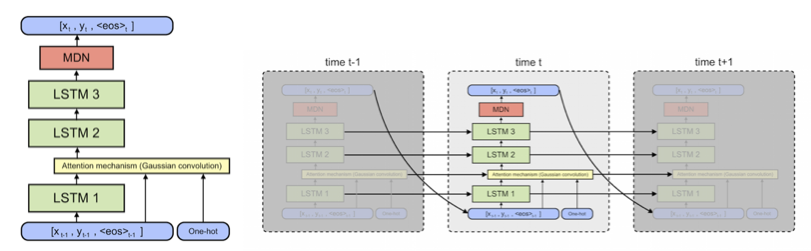

The two images above (from [greydanus](https://greydanus.github.io/2016/08/21/handwriting/)) represent the network created by the author.
1. The input vector correspond to the X, Y and end-of-stroke (eos) position at time ```t``` plus the concatenation of the output of ```t-1```;
2. The first hidden output (from LSTM 1) is used in a "soft window" as well has the characters sequence and determine the aligment between the text and the pen location, then;
3. The the soft window output is used has the input if LSTM 2;
4. The output of the LSTM 2 is used has the input if LSTM 3;
5. The three hidden layers of each resulting LSTM are fed to a Mixture Density Network (MDN)

The weight and bias used in many of the transformation is generated by an "Adaptive Weight Noise", a new Gaussian technique created by the authors and introduced in "Practical Variational Inference for Neural Networks".